<h2 Style="text-align:center;color:#668891;margin:0px"><b>UBER'S DATASET</b></h2>
<h5 Style="text-align:center;color:#885889;margin:0px"><i>Exploratory Data Analysis</i></h5>

<h5 Style=";color:lightgreen;margin:0px">Importing Necessary Python Modules</h5>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats 
import datetime as dt

<h5 Style="color:lightgreen;margin:0px">Reading the Dataset</h5>
<p style="text-size:10px, margin:0">The datset was taken from the kaggel</p>
<p style="text-size:10px, margin:0"> For more info: <a>https://www.kaggle.com/datasets/yashdevladdha/uber-ride-analytics-dashboard</a></p>

In [3]:
data=pd.read_csv('ncr_ride_bookings.csv')
data.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


<p style="text-size:10px;color:red; margin:0">-->Columns of the dataset</p>

In [4]:
columns=data.columns
columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

<h5 style="color:red; text-size:10px">-->Knowing about the datset</h5>

In [5]:
data.shape

(150000, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [7]:
data.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [8]:
data.describe(include='object')

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Reason for cancelling by Customer,Driver Cancellation Reason,Incomplete Rides Reason,Payment Method
count,150000,150000,150000,150000,150000,150000,150000,150000,10500,27000,9000,102000
unique,365,62910,148767,5,148788,7,176,176,5,4,3,5
top,2024-11-16,17:44:57,"""CNR7908610""",Completed,"""CID4523979""",Auto,Khandsa,Ashram,Wrong Address,Customer related issue,Customer Demand,UPI
freq,462,16,3,93000,3,37419,949,936,2362,6837,3040,45909


<h5 style="color:red; text-size:10px">-->Booking Status of the vehicals by the customers</h5>

In [9]:
data['Booking Status'].value_counts()

Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

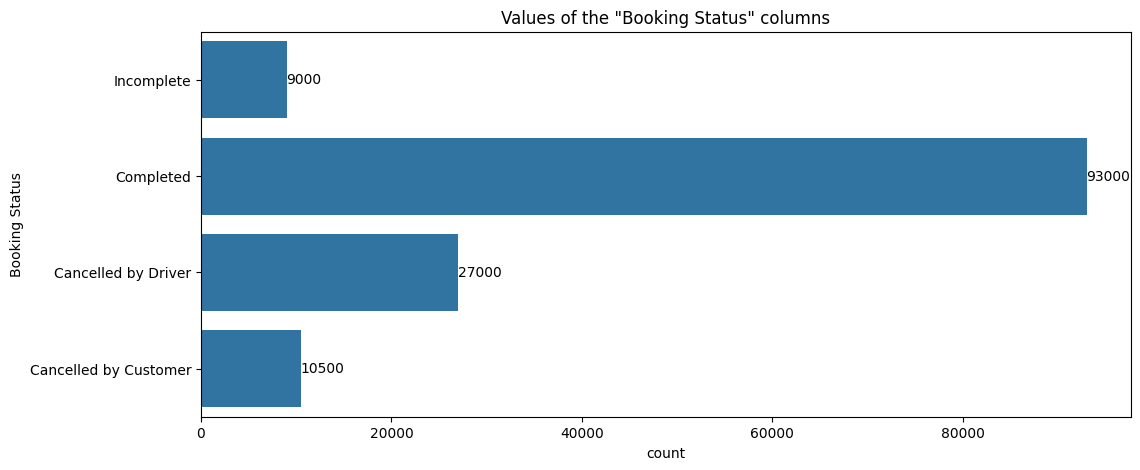

In [108]:
plt.figure(figsize=(12,5))
graph=sns.countplot(data['Booking Status'])
for con in graph.containers:
    graph.bar_label(con)
    plt.title('Values of the "Booking Status" columns')

<h5 style="color:red; text-size:10px">-->Types of Vehicle are running by UBER</h5>

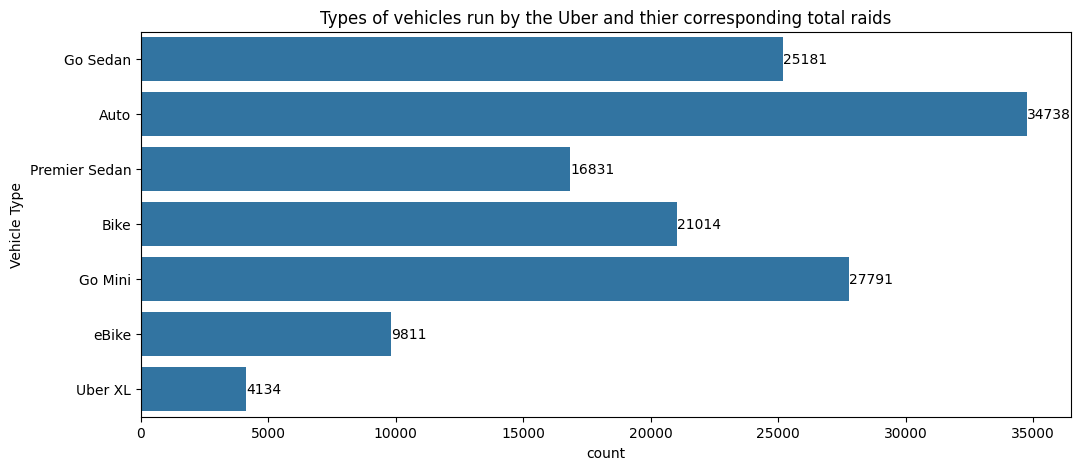

In [109]:
plt.figure(figsize=(12,5))
grf=sns.countplot(data['Vehicle Type'])
for container in grf.containers:
    grf.bar_label(container)
plt.title('Types of vehicles run by the Uber and thier corresponding total raids' )
plt.show()


<h5 style="color:red; text-size:10px">-->Types of payment made by the customer </h5>

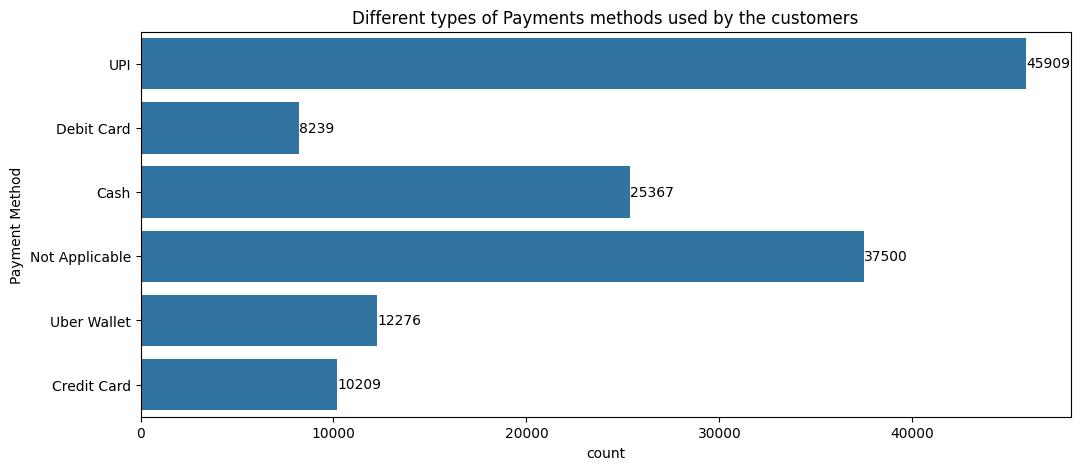

In [110]:
plt.figure(figsize=(12,5))
grf=sns.countplot(data['Payment Method'])
for container in grf.containers:
    grf.bar_label(container)
plt.title('Different types of Payments methods used by the customers')
plt.show()

<h4 style="text-align:center; color:orange;">Cleaning the dataset and handling missing values</h4>

<h5>1. Removing the rows from the dataset where the raids are cancelled because of the reason <b>"NO Driver Found"</b></h5>

In [17]:
data=data[data['Booking Status']!='No Driver Found']
data.shape

(139500, 21)

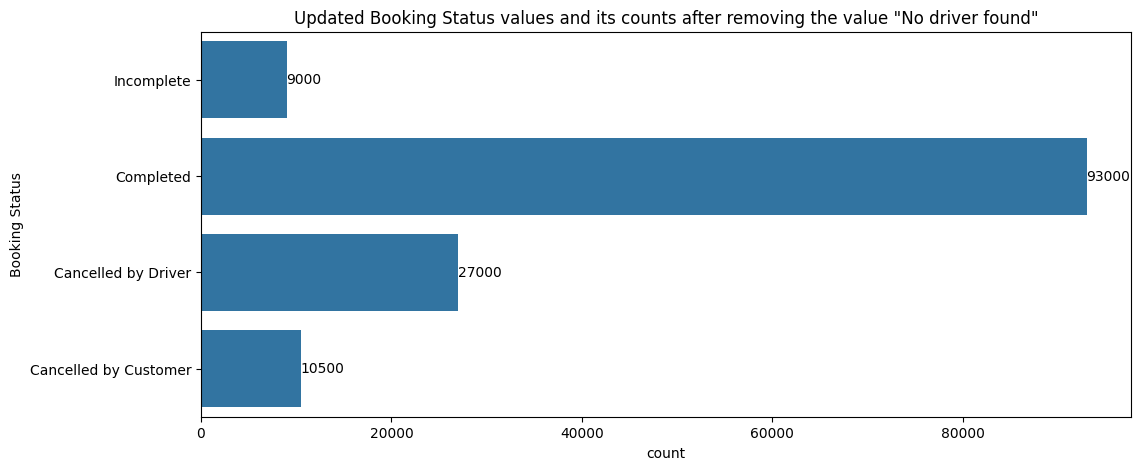

In [112]:
plt.figure(figsize=(12,5))
graph=sns.countplot(data['Booking Status'])
for con in graph.containers:
    graph.bar_label(con)
plt.title('Updated Booking Status values and its counts after removing the value "No driver found"')
plt.show()

<h5>2. Counting the null values</h5>

In [20]:
data.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                                  0
Avg CTAT                              37500
Cancelled Rides by Customer          129000
Reason for cancelling by Customer    129000
Cancelled Rides by Driver            112500
Driver Cancellation Reason           112500
Incomplete Rides                     130500
Incomplete Rides Reason              130500
Booking Value                         37500
Ride Distance                         37500
Driver Ratings                        46500
Customer Rating                       46500
Payment Method                        37500
null_counter                              0
dtype: int64

In [21]:
# counting the null values across the rows
data['null_counter']=data.isnull().sum(axis=1)
data.shape

(139500, 22)

In [22]:
# Removing the the rows which has most null values and unsucessfull raids
data=data[data['null_counter']!=13]
data.shape

(139500, 22)

In [23]:
#Removing the columns 'Booking Id' and 'Customer ID'
data=data.drop(columns=['Booking ID', 'Customer ID'])
data

,Date,Time,Booking Status,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,null_counter
1,2024-11-29,18:01:39,Incomplete,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,6
2,2024-08-23,08:56:10,Completed,Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,6
3,2024-10-21,17:17:25,Completed,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI,6
4,2024-09-16,22:08:00,Completed,Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI,6
5,2024-02-06,09:44:56,Completed,Auto,AIIMS,Narsinghpur,5.1,18.1,NaN,NaN,NaN,NaN,NaN,NaN,316.0,4.85,4.1,4.6,UPI,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,Completed,Go Mini,MG Road,Ghitorni,10.2,44.4,NaN,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet,6
149996,2024-11-24,15:55:09,Completed,Go Mini,Golf Course Road,Akshardham,5.1,30.8,NaN,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI,6
149997,2024-09-18,10:55:15,Completed,Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,NaN,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash,6
149998,2024-10-05,07:53:34,Completed,Auto,Ghaziabad,Saidulajab,6.9,39.6,NaN,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI,6


In [25]:
# knowing about the Average VTAT stats
data['Avg VTAT'].describe()

count    139500.000000
mean          8.456352
std           3.773564
min           2.000000
25%           5.300000
50%           8.300000
75%          11.300000
max          20.000000
Name: Avg VTAT, dtype: float64

In [115]:
# Filling the missing value of "Avg VTAT" column with the median values
V_median=data['Avg VTAT'].median()
data['Avg VTAT'].fillna(V_median, inplace=True)

C:\Users\rohan\AppData\Local\Temp\ipykernel_972\788183081.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Avg VTAT'].fillna(V_median, inplace=True)


In [116]:
# knowing about the Average CTAT stats
print(data['Avg CTAT'].std())
print(data['Avg CTAT'].median())
print(data['Avg CTAT'].var())

7.614093014435646
28.8
57.974412432477706


In [30]:
# Filling the missing value of "Avg CTAT" column with the median values
C_median=data['Avg CTAT'].median()
data['Avg CTAT'].fillna(C_median, inplace=True)

C:\Users\rohan\AppData\Local\Temp\ipykernel_972\2712937936.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Avg CTAT'].fillna(C_median, inplace=True)


In [31]:
# Replacing the values of "null" with '0' for  the column "Cancelled Rides by Customer"
data['Cancelled Rides by Customer'].fillna(0, inplace=True)

C:\Users\rohan\AppData\Local\Temp\ipykernel_972\1178898340.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cancelled Rides by Customer'].fillna(0, inplace=True)


In [32]:
Check_cond=data[data['Cancelled Rides by Customer']==1]

In [33]:
Check_cond['Reason for cancelling by Customer'].value_counts()

Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64

In [34]:
# Checking for null values in the column "Reason for cancelling by Customer"
Check_cond['Reason for cancelling by Customer'].isnull().sum()

0

In [35]:
#  Replacing the values of "null" with 'Not Applicabe' for  the column "Reason for cancelling by Customer"
data['Reason for cancelling by Customer'].fillna('Not Applicable', inplace=True)

C:\Users\rohan\AppData\Local\Temp\ipykernel_972\3443847491.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Reason for cancelling by Customer'].fillna('Not Applicable', inplace=True)


In [36]:
# Checking for null values after replacing
data['Cancelled Rides by Driver'].value_counts()

Cancelled Rides by Driver
1.0    27000
Name: count, dtype: int64

In [37]:
# Replacing the values of "null" with '0' for  the column "Cancelled Rides by Driver"
data['Cancelled Rides by Driver'].fillna(0, inplace=True)

C:\Users\rohan\AppData\Local\Temp\ipykernel_972\213879031.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cancelled Rides by Driver'].fillna(0, inplace=True)


In [38]:
Cancelled_check=data[data['Cancelled Rides by Driver']==1]
Cancelled_check['Driver Cancellation Reason'].value_counts()

Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
Name: count, dtype: int64

In [117]:
# Checking for null values in the column "Driver Cancellation Reason"
Cancelled_check['Driver Cancellation Reason'].isnull().sum()

0

In [118]:
#  Replacing the values of "null" with 'Not Applicabe' for  the column "Driver Cancellation Reason"
data['Driver Cancellation Reason'].fillna('Not Applicable', inplace=True)

C:\Users\rohan\AppData\Local\Temp\ipykernel_972\2600665867.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Driver Cancellation Reason'].fillna('Not Applicable', inplace=True)


In [41]:
# Checking for null values after replacing
data['Incomplete Rides'].value_counts()

Incomplete Rides
1.0    9000
Name: count, dtype: int64

In [42]:
# Replacing the values of "null" with '0' for  the column "Incomplete raids"
data['Incomplete Rides'].fillna(0, inplace=True)

C:\Users\rohan\AppData\Local\Temp\ipykernel_972\3652237109.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Incomplete Rides'].fillna(0, inplace=True)


In [43]:
# Collecting all the incomplete rides info
Incomplete_check=data[data['Incomplete Rides']==1]

In [44]:
# Checking all the reasons for incomplete rides
Incomplete_check['Incomplete Rides Reason'].value_counts()

Incomplete Rides Reason
Customer Demand      3040
Vehicle Breakdown    3012
Other Issue          2948
Name: count, dtype: int64

In [45]:
Incomplete_check['Incomplete Rides Reason'].isnull().sum()

0

In [46]:
#  Replacing the values of "null" with 'Not Applicabe' for  the column "incomplete Ride Reason"

data['Incomplete Rides Reason'].fillna('Not Applicable', inplace=True)

C:\Users\rohan\AppData\Local\Temp\ipykernel_972\2453328951.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Incomplete Rides Reason'].fillna('Not Applicable', inplace=True)


In [47]:
# Changing the value of the column "Booking Value" to '0' as the ride was cancelled and customer never travelled.
data.loc[data['Cancelled Rides by Customer']==1, 'Booking Value']=0

In [48]:
# Changing the value of the column "Booking Value" to '0' as the ride was cancelled and customer never travelled.
data.loc[data['Cancelled Rides by Driver']==1, 'Booking Value']=0

In [49]:
# Similarly Changing the value of the column "Ride Distance" to '0' as the ride was cancelled and customer never travelled.

data.loc[data['Cancelled Rides by Customer']==1, 'Ride Distance']=0
data.loc[data['Cancelled Rides by Driver']==1, 'Ride Distance']=0

In [50]:
# Changing the value of the column "Payment Method" to 'Not Applicable' as the ride was cancelled and customer never travelled.

data.loc[data['Cancelled Rides by Customer']==1, 'Payment Method']='Not Applicable'
data.loc[data['Cancelled Rides by Driver']==1, 'Payment Method']='Not Applicable'

In [51]:
# Changing the value of the columns driver rating and customer rating to '0' as the ride was cancelled and customer never travelled.

data.loc[data['Cancelled Rides by Customer']==1, 'Driver Ratings']=0
data.loc[data['Cancelled Rides by Driver']==1, 'Driver Ratings']=0
data.loc[data['Cancelled Rides by Customer']==1, 'Customer Rating']=0
data.loc[data['Cancelled Rides by Driver']==1, 'Customer Rating']=0


In [52]:
data.isnull().sum()

Date                                    0
Time                                    0
Booking Status                          0
Vehicle Type                            0
Pickup Location                         0
Drop Location                           0
Avg VTAT                                0
Avg CTAT                                0
Cancelled Rides by Customer             0
Reason for cancelling by Customer       0
Cancelled Rides by Driver               0
Driver Cancellation Reason              0
Incomplete Rides                        0
Incomplete Rides Reason                 0
Booking Value                           0
Ride Distance                           0
Driver Ratings                       9000
Customer Rating                      9000
Payment Method                          0
null_counter                            0
dtype: int64

In [53]:
# calculating mean for the columns "Driver Ratings" & "Customer Rating" for filling in the place of null values.
dmean=data['Driver Ratings'].mean()
smean=data['Customer Rating'].mean()
print(dmean, smean)

3.0151900383141768 3.1388988505747126


In [54]:
data['Driver Ratings'].fillna(dmean, inplace=True)
data['Customer Rating'].fillna(smean, inplace=True)

C:\Users\rohan\AppData\Local\Temp\ipykernel_972\2439085630.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Driver Ratings'].fillna(dmean, inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_972\2439085630.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [55]:
# Finally no null values: The Data is clean :)
data.isnull().sum()

Date                                 0
Time                                 0
Booking Status                       0
Vehicle Type                         0
Pickup Location                      0
Drop Location                        0
Avg VTAT                             0
Avg CTAT                             0
Cancelled Rides by Customer          0
Reason for cancelling by Customer    0
Cancelled Rides by Driver            0
Driver Cancellation Reason           0
Incomplete Rides                     0
Incomplete Rides Reason              0
Booking Value                        0
Ride Distance                        0
Driver Ratings                       0
Customer Rating                      0
Payment Method                       0
null_counter                         0
dtype: int64

In [56]:
# Conversion of Data and Time from Objects to Data and Time datatype
data['Date']=pd.to_datetime(data['Date'])
data['Time']=pd.to_datetime(data['Time'], errors='coerce').dt.time

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139500 entries, 1 to 149999
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               139500 non-null  datetime64[ns]
 1   Time                               139500 non-null  object        
 2   Booking Status                     139500 non-null  object        
 3   Vehicle Type                       139500 non-null  object        
 4   Pickup Location                    139500 non-null  object        
 5   Drop Location                      139500 non-null  object        
 6   Avg VTAT                           139500 non-null  float64       
 7   Avg CTAT                           139500 non-null  float64       
 8   Cancelled Rides by Customer        139500 non-null  float64       
 9   Reason for cancelling by Customer  139500 non-null  object        
 10  Cancelled Rides by Driver

In [59]:
data.head(10)

,Date,Time,Booking Status,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,null_counter
1,2024-11-29,18:01:39,Incomplete,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,0.0,Not Applicable,0.0,Not Applicable,1.0,Vehicle Breakdown,237.0,5.73,3.01519,3.138899,UPI,6
2,2024-08-23,08:56:10,Completed,Auto,Khandsa,Malviya Nagar,13.4,25.8,0.0,Not Applicable,0.0,Not Applicable,0.0,Not Applicable,627.0,13.58,4.90000,4.900000,Debit Card,6
3,2024-10-21,17:17:25,Completed,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,0.0,Not Applicable,0.0,Not Applicable,0.0,Not Applicable,416.0,34.02,4.60000,5.000000,UPI,6
4,2024-09-16,22:08:00,Completed,Bike,Ghitorni Village,Khan Market,5.3,19.6,0.0,Not Applicable,0.0,Not Applicable,0.0,Not Applicable,737.0,48.21,4.10000,4.300000,UPI,6
5,2024-02-06,09:44:56,Completed,Auto,AIIMS,Narsinghpur,5.1,18.1,0.0,Not Applicable,0.0,Not Applicable,0.0,Not Applicable,316.0,4.85,4.10000,4.600000,UPI,6
6,2024-06-17,15:45:58,Completed,Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,0.0,Not Applicable,0.0,Not Applicable,0.0,Not Applicable,640.0,41.24,4.00000,4.100000,UPI,6
7,2024-03-19,17:37:37,Completed,Auto,Mayur Vihar,Cyber Hub,12.1,16.5,0.0,Not Applicable,0.0,Not Applicable,0.0,Not Applicable,136.0,6.56,4.40000,4.200000,UPI,6
9,2024-12-16,19:06:48,Incomplete,Auto,Rohini,Adarsh Nagar,6.1,26.0,0.0,Not Applicable,0.0,Not Applicable,1.0,Other Issue,135.0,10.36,3.01519,3.138899,Cash,6
10,2024-06-14,16:24:12,Completed,Auto,Udyog Bhawan,Dwarka Sector 21,7.7,18.9,0.0,Not Applicable,0.0,Not Applicable,0.0,Not Applicable,181.0,19.84,4.20000,4.900000,Cash,6
12,2024-06-25,22:44:15,Cancelled by Driver,eBike,Patel Chowk,Kherki Daula Toll,4.6,28.8,0.0,Not Applicable,1.0,Personal & Car related issues,0.0,Not Applicable,0.0,0.00,0.00000,0.000000,Not Applicable,10


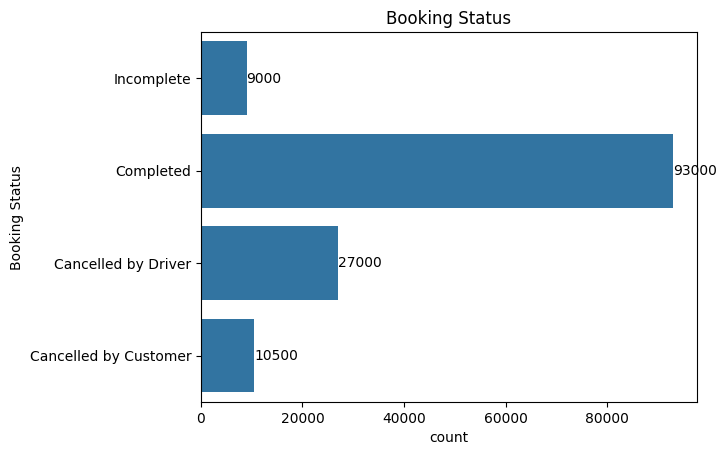

In [119]:
plot=sns.countplot(data['Booking Status'])
for con in plot.containers:
    plot.bar_label(con)
plt.title("Booking Status")
plt.show()

In [61]:
# Avereage daily raids Statistics
print("Averege numbers of Raids:                ",data.groupby('Date')['Booking Status'].count().mean())
print("Avg no. of completed Raids:              ",data[data['Booking Status'] == 'Completed'].groupby('Date')['Booking Status'].count().mean()
)
print('Avg no. of Incomplete Raids:             ',data[data['Booking Status'] == 'Incomplete'].groupby('Date')['Booking Status'].count().mean()
)
print("Avg no. Raids cancelled by driver:       ",data[data['Booking Status'] == 'Cancelled by Driver'].groupby('Date')['Booking Status'].count().mean()
)
print("Avg no. of raids cancelled by Customer:  ",data[data['Booking Status'] == 'Cancelled by Customer'].groupby('Date')['Booking Status'].count().mean()
)

Averege numbers of Raids:                 382.1917808219178
Avg no. of completed Raids:               254.7945205479452
Avg no. of Incomplete Raids:              24.65753424657534
Avg no. Raids cancelled by driver:        73.97260273972603
Avg no. of raids cancelled by Customer:   28.767123287671232


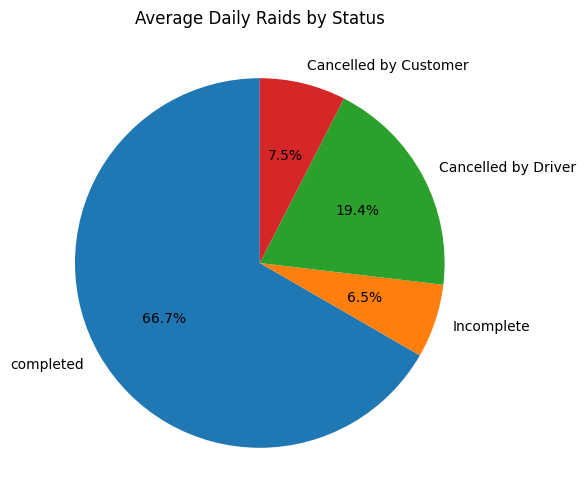

In [62]:
# Plotting a pie chart of average daily raids
avg_com=data[data['Booking Status'] == 'Completed'].groupby('Date')['Booking Status'].count().mean()
avg_incom=data[data['Booking Status'] == 'Incomplete'].groupby('Date')['Booking Status'].count().mean()
avg_c_d=data[data['Booking Status'] == 'Cancelled by Driver'].groupby('Date')['Booking Status'].count().mean()
avg_c_c=data[data['Booking Status'] == 'Cancelled by Customer'].groupby('Date')['Booking Status'].count().mean()

avg_data={
    "completed":avg_com,
    "Incomplete":avg_incom,
    "Cancelled by Driver":avg_c_d,
    "Cancelled by Customer":avg_c_c
}

plt.figure(figsize=(6,6))
plt.pie(avg_data.values(), labels=avg_data.keys(), autopct='%1.1f%%', startangle=90)
plt.title("Average Daily Raids by Status")
plt.show()

In [63]:
# Function to differentiate time into different time-periods
def label_time(time):
    if time is None or pd.isna(time):
        return "UnKnown"
    if time >=dt.time(5,0) and time<dt.time(12,0):
        return "Morning"
    elif time >= dt.time(12,0) and time < dt.time(16,30):
        return "Afternoon"
    elif time >= dt.time(16,30) and time < dt.time(21,0):
        return "Evening"
    else:
        return "Night"

In [64]:
# applying a function to create a time-period columns
data['Period']=data['Time'].apply(label_time)

In [65]:
data

,Date,Time,Booking Status,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,...,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,null_counter,Period
1,2024-11-29,18:01:39,Incomplete,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,0.0,Not Applicable,...,Not Applicable,1.0,Vehicle Breakdown,237.0,5.73,3.01519,3.138899,UPI,6,Evening
2,2024-08-23,08:56:10,Completed,Auto,Khandsa,Malviya Nagar,13.4,25.8,0.0,Not Applicable,...,Not Applicable,0.0,Not Applicable,627.0,13.58,4.90000,4.900000,Debit Card,6,Morning
3,2024-10-21,17:17:25,Completed,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,0.0,Not Applicable,...,Not Applicable,0.0,Not Applicable,416.0,34.02,4.60000,5.000000,UPI,6,Evening
4,2024-09-16,22:08:00,Completed,Bike,Ghitorni Village,Khan Market,5.3,19.6,0.0,Not Applicable,...,Not Applicable,0.0,Not Applicable,737.0,48.21,4.10000,4.300000,UPI,6,Night
5,2024-02-06,09:44:56,Completed,Auto,AIIMS,Narsinghpur,5.1,18.1,0.0,Not Applicable,...,Not Applicable,0.0,Not Applicable,316.0,4.85,4.10000,4.600000,UPI,6,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,Completed,Go Mini,MG Road,Ghitorni,10.2,44.4,0.0,Not Applicable,...,Not Applicable,0.0,Not Applicable,475.0,40.08,3.70000,4.100000,Uber Wallet,6,Evening
149996,2024-11-24,15:55:09,Completed,Go Mini,Golf Course Road,Akshardham,5.1,30.8,0.0,Not Applicable,...,Not Applicable,0.0,Not Applicable,1093.0,21.31,4.80000,5.000000,UPI,6,Afternoon
149997,2024-09-18,10:55:15,Completed,Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,0.0,Not Applicable,...,Not Applicable,0.0,Not Applicable,852.0,15.93,3.90000,4.400000,Cash,6,Morning
149998,2024-10-05,07:53:34,Completed,Auto,Ghaziabad,Saidulajab,6.9,39.6,0.0,Not Applicable,...,Not Applicable,0.0,Not Applicable,333.0,45.54,4.10000,3.700000,UPI,6,Morning


In [66]:
# Time-Period wise Booking Status
data.groupby('Period')['Booking Status'].value_counts()

Period     Booking Status       
Afternoon  Completed                20036
           Cancelled by Driver       5924
           Cancelled by Customer     2330
           Incomplete                1950
Evening    Completed                30295
           Cancelled by Driver       8835
           Cancelled by Customer     3410
           Incomplete                2989
Morning    Completed                28258
           Cancelled by Driver       8126
           Cancelled by Customer     3165
           Incomplete                2714
Night      Completed                14411
           Cancelled by Driver       4115
           Cancelled by Customer     1595
           Incomplete                1347
Name: count, dtype: int64

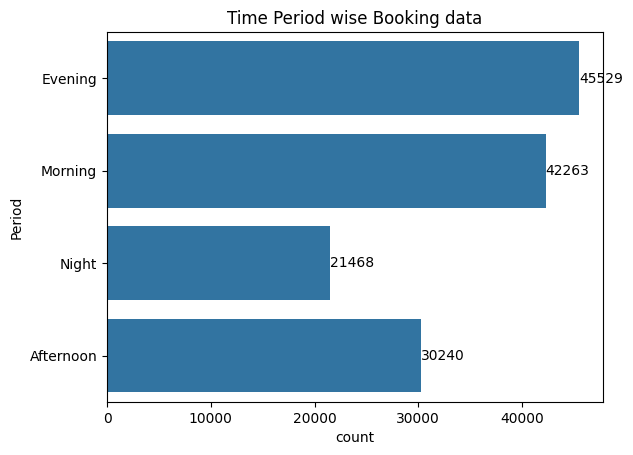

In [120]:
grf=sns.countplot(data['Period'])
for con in grf.containers:
    grf.bar_label(con)
plt.title('Time Period wise Booking data')
plt.show()

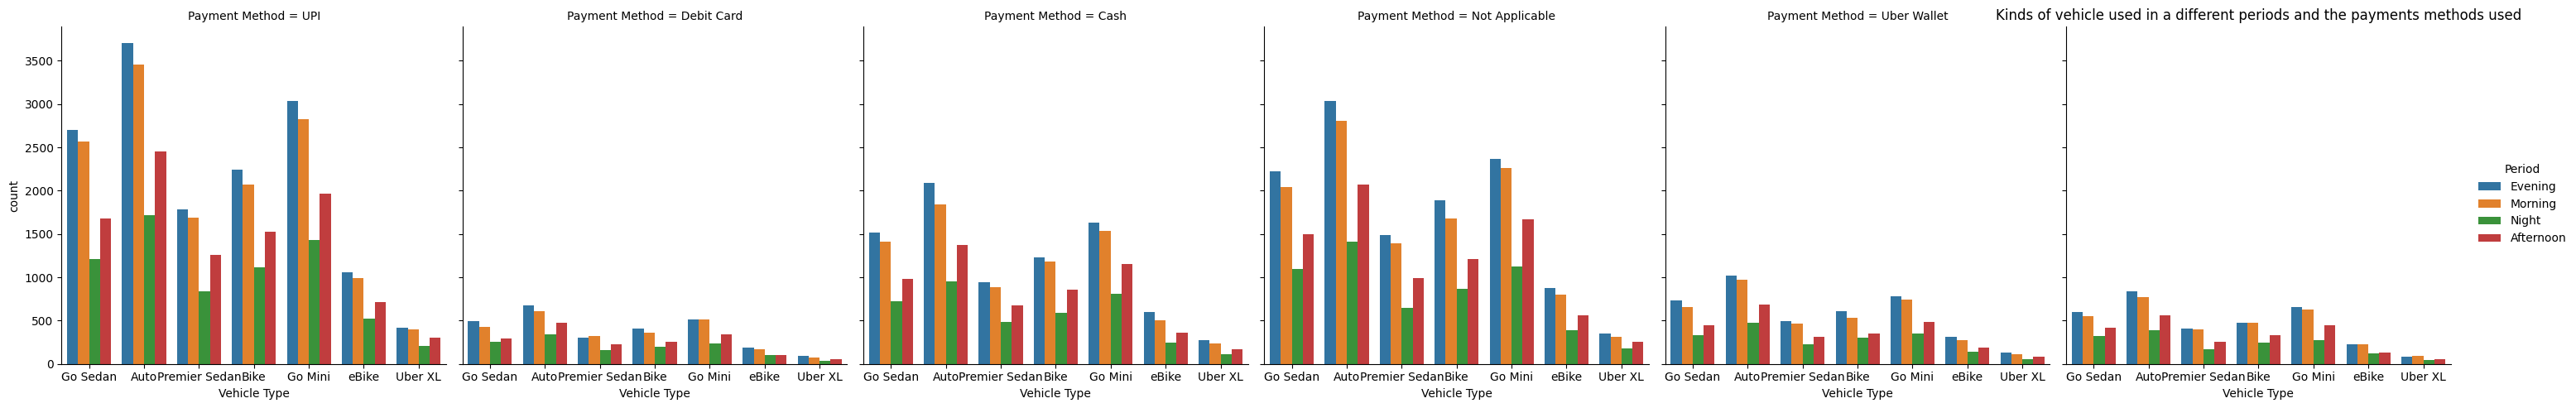

In [123]:
sns.catplot(x='Vehicle Type', hue='Period', col='Payment Method',data=data, kind='count')
plt.title("Kinds of vehicle used in a different periods and the payments methods used")
plt.show()

In [69]:
# vehicle wise payment methods count
pd.crosstab(data['Vehicle Type'], data['Payment Method'])

Payment Method,Cash,Credit Card,Debit Card,Not Applicable,UPI,Uber Wallet
Vehicle Type,,,,,,
Auto,6252,2568,2097,9323,11336,3162
Bike,3854,1527,1222,5652,6966,1793
Go Mini,5137,2006,1608,7427,9256,2357
Go Sedan,4643,1884,1470,6863,8153,2168
Premier Sedan,2990,1240,1007,4516,5574,1504
Uber XL,784,278,267,1089,1329,387
eBike,1707,706,568,2630,3295,905


In [70]:
# kinds of vehicle used in different period of time
pd.crosstab(data['Vehicle Type'], data['Period'])

Period,Afternoon,Evening,Morning,Night
Vehicle Type,,,,
Auto,7617,11370,10461,5290
Bike,4542,6856,6297,3319
Go Mini,6060,8991,8514,4226
Go Sedan,5313,8266,7660,3942
Premier Sedan,3721,5430,5154,2526
Uber XL,924,1347,1225,638
eBike,2063,3269,2952,1527


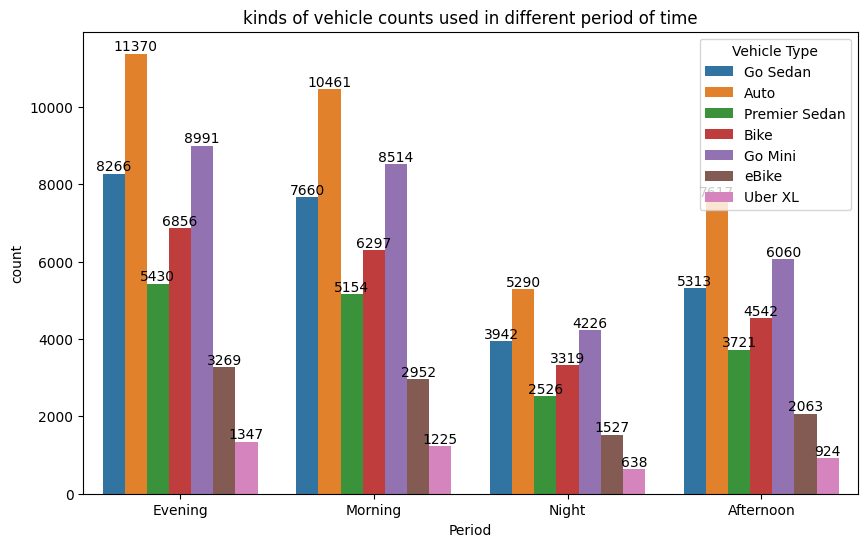

In [125]:
plt.figure(figsize=(10,6))
pl=sns.countplot(data=data, x='Period', hue='Vehicle Type')

for con in pl.containers:
    pl.bar_label(con)
plt.title("kinds of vehicle counts used in different period of time")
plt.show()

<h5 style="color:red; text-size:10px">Analysing Morning data</h5>

In [72]:
# dividing a morning travel data into new dataframe
mdata=data[data['Period']=='Morning']
mdata.shape

(42263, 21)

In [73]:
mdata.head(3)

,Date,Time,Booking Status,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,...,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,null_counter,Period
2,2024-08-23,08:56:10,Completed,Auto,Khandsa,Malviya Nagar,13.4,25.8,0.0,Not Applicable,...,Not Applicable,0.0,Not Applicable,627.0,13.58,4.9,4.9,Debit Card,6,Morning
5,2024-02-06,09:44:56,Completed,Auto,AIIMS,Narsinghpur,5.1,18.1,0.0,Not Applicable,...,Not Applicable,0.0,Not Applicable,316.0,4.85,4.1,4.6,UPI,6,Morning
16,2024-07-01,10:51:16,Completed,Premier Sedan,IGI Airport,Madipur,5.6,27.5,0.0,Not Applicable,...,Not Applicable,0.0,Not Applicable,401.0,21.97,4.9,4.3,UPI,6,Morning


In [74]:
# function to classify Morning timings into further classes like EarlyMorning, WorkingHours and LateMorning
def define_morning(tym):
    if tym is None:
        return "NaN"
    if tym >= dt.time(5,0) and tym < dt.time(7,30):
        return "EarlyMorning"
    elif tym >= dt.time(7,30) and tym < dt.time(10,30):
        return "WorkingHours"
    else:
        return "LateMorning"

In [75]:
# Applying a classifying function
mdata['Period']=mdata['Time'].apply(define_morning)
mdata.head(3)

C:\Users\rohan\AppData\Local\Temp\ipykernel_972\2770475238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdata['Period']=mdata['Time'].apply(define_morning)


,Date,Time,Booking Status,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,...,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,null_counter,Period
2,2024-08-23,08:56:10,Completed,Auto,Khandsa,Malviya Nagar,13.4,25.8,0.0,Not Applicable,...,Not Applicable,0.0,Not Applicable,627.0,13.58,4.9,4.9,Debit Card,6,WorkingHours
5,2024-02-06,09:44:56,Completed,Auto,AIIMS,Narsinghpur,5.1,18.1,0.0,Not Applicable,...,Not Applicable,0.0,Not Applicable,316.0,4.85,4.1,4.6,UPI,6,WorkingHours
16,2024-07-01,10:51:16,Completed,Premier Sedan,IGI Airport,Madipur,5.6,27.5,0.0,Not Applicable,...,Not Applicable,0.0,Not Applicable,401.0,21.97,4.9,4.3,UPI,6,LateMorning


Period
WorkingHours    21056
LateMorning     12225
EarlyMorning     8982
Name: count, dtype: int64


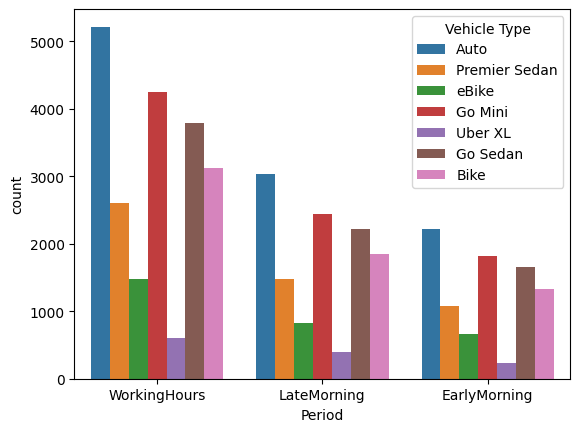

In [76]:
# Time classes wise Vehicle type count
sns.countplot(mdata,x='Period', hue='Vehicle Type')
print(mdata['Period'].value_counts())

<h5 style="color:red; text-size:10px">Analysing Afternoon data</h5>

In [77]:
adata=data[data['Period']=='Afternoon']

In [78]:
def define_afternoon(tym):
    if tym is None:
        return "NaN"
    if tym >= dt.time(12,0) and tym < dt.time(14,30):
        return "EarlyNoon"
    elif tym >= dt.time(14,30) and tym < dt.time(16,30):
        return "LateNoon"

In [79]:
adata['Period']=data['Time'].apply(define_afternoon)

C:\Users\rohan\AppData\Local\Temp\ipykernel_972\2761010596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata['Period']=data['Time'].apply(define_afternoon)


Period
LateNoon     15411
EarlyNoon    14829
Name: count, dtype: int64


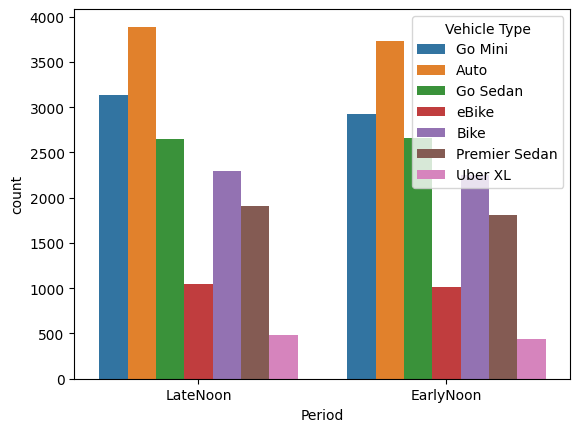

In [80]:
sns.countplot(adata,x='Period', hue='Vehicle Type')
print(adata['Period'].value_counts())

<h5 style="color:red; text-size:10px">Analysing Evening data</h5>

In [81]:
edata=data[data['Period']=='Evening']
edata.head()

,Date,Time,Booking Status,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,...,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,null_counter,Period
1,2024-11-29,18:01:39,Incomplete,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,0.0,Not Applicable,...,Not Applicable,1.0,Vehicle Breakdown,237.0,5.73,3.01519,3.138899,UPI,6,Evening
3,2024-10-21,17:17:25,Completed,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,0.0,Not Applicable,...,Not Applicable,0.0,Not Applicable,416.0,34.02,4.60000,5.000000,UPI,6,Evening
7,2024-03-19,17:37:37,Completed,Auto,Mayur Vihar,Cyber Hub,12.1,16.5,0.0,Not Applicable,...,Not Applicable,0.0,Not Applicable,136.0,6.56,4.40000,4.200000,UPI,6,Evening
9,2024-12-16,19:06:48,Incomplete,Auto,Rohini,Adarsh Nagar,6.1,26.0,0.0,Not Applicable,...,Not Applicable,1.0,Other Issue,135.0,10.36,3.01519,3.138899,Cash,6,Evening
13,2024-09-11,19:29:39,Completed,Go Mini,Malviya Nagar,Ghitorni Village,12.2,28.2,0.0,Not Applicable,...,Not Applicable,0.0,Not Applicable,394.0,21.44,4.10000,4.700000,UPI,6,Evening


In [82]:
def define_eve(tym):
    if tym is None:
        return "NA"
    if tym>=dt.time(16,30) and tym < dt.time(19,0):
        return "Early Evening"
    else:
        return "Late Evening"

In [83]:
edata['Period']=edata['Time'].apply(define_eve)

C:\Users\rohan\AppData\Local\Temp\ipykernel_972\2790358963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edata['Period']=edata['Time'].apply(define_eve)


Period
LateNoon     15411
EarlyNoon    14829
Name: count, dtype: int64


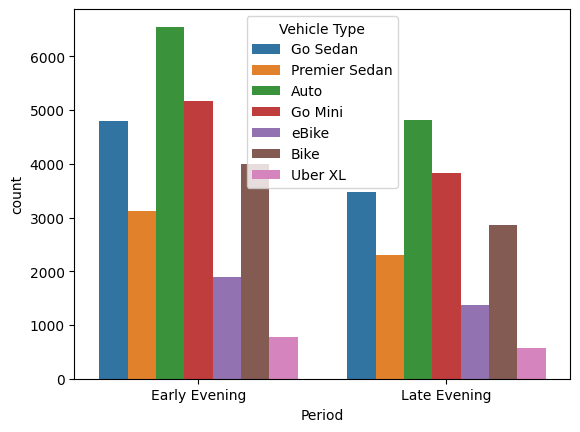

In [84]:
sns.countplot(edata,x='Period', hue='Vehicle Type')
print(adata['Period'].value_counts())

In [128]:
# checking the average travel cost across all the time classes
print(f"Average Price in morning:   {mdata['Booking Value'].mean()}")
print(f"Average Price in afternoon: {adata['Booking Value'].mean()}")
print(f"Average Price in Evening:   {edata['Booking Value'].mean()}")

Average Price in morning:   373.56441804888436
Average Price in afternoon: 368.83783068783066
Average Price in Evening:   369.886314217312


In [129]:
# printing all the locations
data['Drop Location'].unique()

array(['Gurgaon Sector 56', 'Malviya Nagar', 'Inderlok', 'Khan Market',
       'Narsinghpur', 'Punjabi Bagh', 'Cyber Hub', 'Adarsh Nagar',
       'Dwarka Sector 21', 'Kherki Daula Toll', 'Ghitorni Village',
       'GTB Nagar', 'Madipur', 'Anand Vihar', 'Rajiv Nagar',
       'Mansarovar Park', 'Botanical Garden', 'IMT Manesar',
       'Old Gurgaon', 'Barakhamba Road', 'Saket', 'Vishwavidyalaya',
       'Preet Vihar', 'Nehru Place', 'Shahdara', 'Noida Film City',
       'Mandi House', 'Janakpuri', 'Udyog Vihar Phase 4',
       'Civil Lines Gurgaon', 'Karkarduma', 'Tagore Garden',
       'Noida Extension', 'Anand Vihar ISBT', 'Central Secretariat',
       'Hauz Rani', 'Palam Vihar', 'RK Puram', 'Basai Dhankot',
       'Badarpur', 'Ramesh Nagar', 'Akshardham', 'Yamuna Bank',
       'IGI Airport', 'New Colony', 'Green Park', 'ITO', 'Mehrauli',
       'New Delhi Railway Station', 'Mundka', 'India Gate', 'Pitampura',
       'Netaji Subhash Place', 'Indraprastha', 'Rohini', 'Chirag Delhi',
   

In [86]:
# Analysing the stats of Ride distance
data['Ride Distance'].describe()

count    139500.000000
mean         18.014159
std          16.206826
min           0.000000
25%           0.000000
50%          15.210000
75%          31.990000
max          50.000000
Name: Ride Distance, dtype: float64

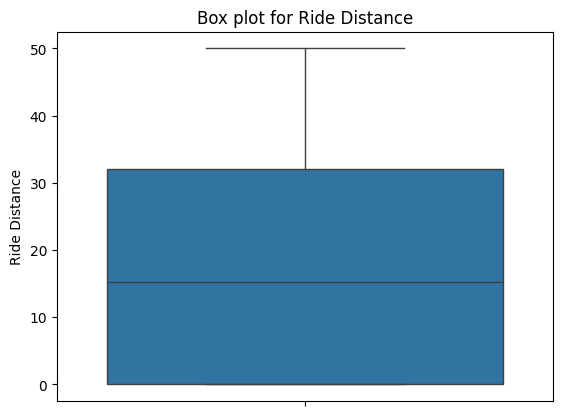

In [130]:
sns.boxplot(data['Ride Distance'])
plt.title("Box plot for Ride Distance")
plt.show()

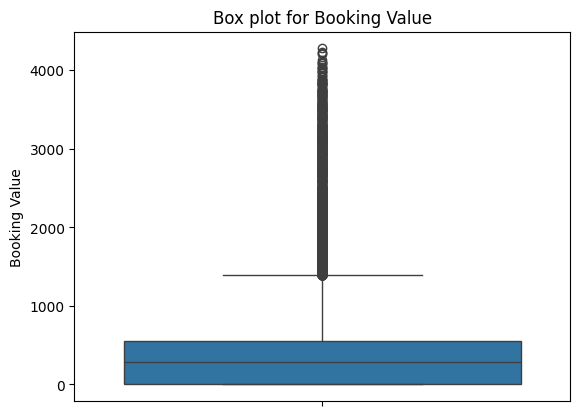

In [131]:
sns.boxplot(data['Booking Value'])
plt.title("Box plot for Booking Value")
plt.show()

In [89]:
# Analysing the stats of Booking value

data['Booking Value'].describe()

count    139500.000000
mean        371.657226
std         406.609801
min           0.000000
25%           0.000000
50%         282.000000
75%         557.000000
max        4277.000000
Name: Booking Value, dtype: float64

In [132]:
# kinds of vehicle wise mean and max booking value
print(data.groupby('Vehicle Type')['Booking Value'].mean())
print(data.groupby('Vehicle Type')['Booking Value'].max())

Vehicle Type
Auto             370.730094
Bike             372.975017
Go Mini          372.008780
Go Sedan         372.094794
Premier Sedan    372.843681
Uber XL          369.625544
eBike            368.819183
Name: Booking Value, dtype: float64
Vehicle Type
Auto             4220.0
Bike             4228.0
Go Mini          4277.0
Go Sedan         4088.0
Premier Sedan    4008.0
Uber XL          3703.0
eBike            4093.0
Name: Booking Value, dtype: float64


In [133]:
# kinds of vehicle wise mean and max Ride Distance

print(data.groupby('Vehicle Type')['Ride Distance'].mean())
print(data.groupby('Vehicle Type')['Ride Distance'].max())

Vehicle Type
Auto             18.009544
Bike             18.019717
Go Mini          18.034637
Go Sedan         17.902133
Premier Sedan    17.998701
Uber XL          17.974555
eBike            18.291323
Name: Ride Distance, dtype: float64
Vehicle Type
Auto             50.00
Bike             50.00
Go Mini          50.00
Go Sedan         50.00
Premier Sedan    49.99
Uber XL          49.99
eBike            49.98
Name: Ride Distance, dtype: float64


In [92]:
# Analysing the reason for ride cancellation
print(data['Reason for cancelling by Customer'].value_counts())
print(data['Driver Cancellation Reason'].value_counts())

Reason for cancelling by Customer
Not Applicable                                  129000
Wrong Address                                     2362
Change of plans                                   2353
Driver is not moving towards pickup location      2335
Driver asked to cancel                            2295
AC is not working                                 1155
Name: count, dtype: int64
Driver Cancellation Reason
Not Applicable                         112500
Customer related issue                   6837
The customer was coughing/sick           6751
Personal & Car related issues            6726
More than permitted people in there      6686
Name: count, dtype: int64


<h5 style="color:red; text-size:10px">Analysing Top most used vehicle-AUTO</h5>

In [94]:
Auto=data[data['Vehicle Type']=='Auto'][['Booking Value', 'Ride Distance', 'Avg VTAT', 'Avg CTAT']]

In [95]:
Auto

,Booking Value,Ride Distance,Avg VTAT,Avg CTAT
2,627.0,13.58,13.4,25.8
5,316.0,4.85,5.1,18.1
7,136.0,6.56,12.1,16.5
9,135.0,10.36,6.1,26.0
10,181.0,19.84,7.7,18.9
...,...,...,...,...
149979,0.0,0.00,5.9,28.8
149989,75.0,8.33,14.2,22.8
149990,0.0,0.00,10.7,28.8
149991,597.0,27.91,11.2,30.8


In [96]:
# calculating Price per Kilometer
Auto['PpK']=(Auto['Booking Value']/Auto['Ride Distance'])

In [97]:
Auto.head(10)

,Booking Value,Ride Distance,Avg VTAT,Avg CTAT,PpK
2,627.0,13.58,13.4,25.8,46.170839
5,316.0,4.85,5.1,18.1,65.154639
7,136.0,6.56,12.1,16.5,20.731707
9,135.0,10.36,6.1,26.0,13.030888
10,181.0,19.84,7.7,18.9,9.122984
15,410.0,34.76,8.5,36.9,11.795167
21,183.0,4.50,7.0,21.3,40.666667
24,767.0,7.39,13.6,25.2,103.788904
26,0.0,0.00,11.5,28.8,NaN
29,2847.0,39.21,8.9,31.1,72.609028


Text(0.5, 1.0, 'Ride Distance vs Averege Price per Kilometer in AUTO')

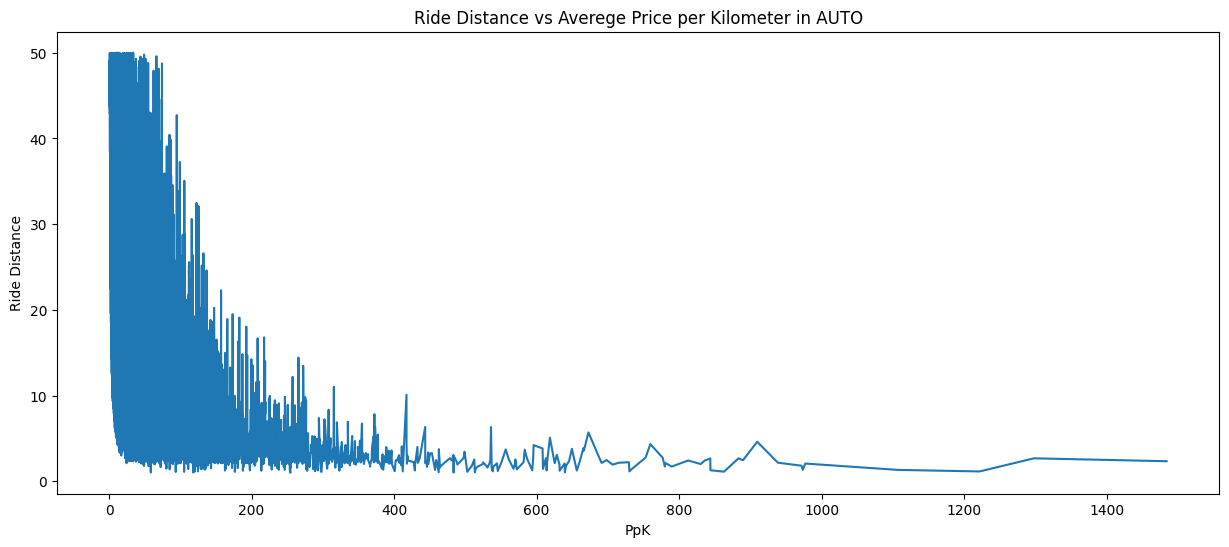

In [135]:
plt.figure(figsize=(15,6))
sns.lineplot(Auto,x='PpK', y='Ride Distance')
plt.title('Ride Distance vs Averege Price per Kilometer in AUTO')

In [99]:
costly_Auto_Rides=Auto[Auto['PpK']>1000]
costly_Auto_Rides

,Booking Value,Ride Distance,Avg VTAT,Avg CTAT,PpK
29078,1483.0,1.34,5.8,29.2,1106.716418
38945,3487.0,2.35,3.9,29.7,1483.829787
52699,1417.0,1.16,8.6,12.7,1221.551724
78576,3491.0,2.69,3.0,17.0,1297.769517


        Booking Value  Ride Distance  Avg VTAT  Avg CTAT        PpK
33              134.0          46.66       2.0      19.4   2.871839
91             2169.0          44.25       8.6      32.7  49.016949
270             932.0          40.21       5.3      43.6  23.178314
287             679.0          47.56       3.8      20.1  14.276703
316             459.0          46.74      13.3      41.6   9.820282
...               ...            ...       ...       ...        ...
149945          959.0          44.42      13.6      32.9  21.589374
149949          505.0          40.03      14.2      40.1  12.615538
149951          228.0          42.45      10.1      16.9   5.371025
149964          643.0          42.97       3.9      39.6  14.963928
149998          333.0          45.54       6.9      39.6   7.312253

[4806 rows x 5 columns]


<Axes: xlabel='PpK', ylabel='Ride Distance'>

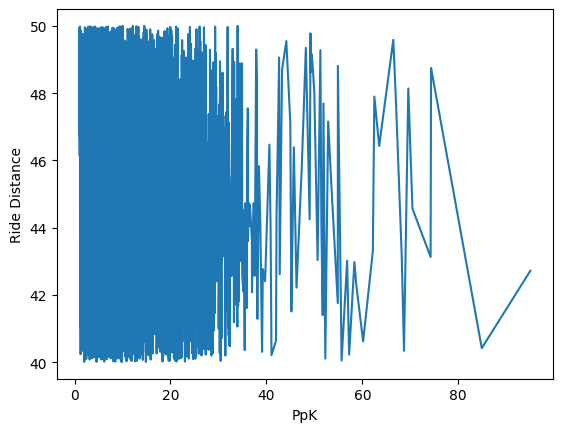

In [100]:
Long_Auto_Rides=Auto[Auto['Ride Distance']>40]
print(Long_Auto_Rides)
sns.lineplot(x=Long_Auto_Rides['PpK'], y=Long_Auto_Rides['Ride Distance'])

In [101]:
# Most Travelled Routes per Vehicle Type
df=data
df['Route']=df['Pickup Location'] +"-->"+ df['Drop Location']
x=df.groupby(['Vehicle Type','Route']).size().to_frame(name='count').sort_values(['Vehicle Type', 'count'],ascending=[True, False]).groupby('Vehicle Type').head()
x

count
Vehicle Type  Route                                    
Auto          Badarpur-->Gurgaon Railway Station      7
              Barakhamba Road-->Sarojini Nagar        7
              Ghaziabad-->Karkarduma                  7
              Jasola-->South Extension                7
              Lok Kalyan Marg-->Sikanderpur           7
Bike          Gurgaon Railway Station-->Munirka       6
              Connaught Place-->Paharganj             5
              GTB Nagar-->Ardee City                  5
              India Gate-->Nawada                     5
              Jama Masjid-->Saket A Block             5
Go Mini       Bhiwadi-->Ardee City                    6
              Khandsa-->Akshardham                    6
              Mehrauli-->Ashram                       6
              Model Town-->Jhilmil                    6
              Pragati Maidan-->Shastri Park           6
Go Sedan      Bhiwadi-->Hauz Rani                     6
              Manesar-->Vishwavidyalaya               6
              Sarai Kale Khan-->Munirka               6
              Seelampur-->Indraprastha                6
              Sonipat-->RK Puram                      6
Premier Sedan Barakhamba Road-->MG Road               5
              ITO-->INA Market                        5
              Kirti Nagar-->Shahdara                  5
              Malviya Nagar-->Udyog Vihar             5
              Rithala-->Basai Dhankot                 5
Uber XL       Ardee City-->Saket                      3
              Ashok Park Main-->Panchsheel Park       3
              Aya Nagar-->Kashmere Gate ISBT          3
              Bahadurgarh-->Lajpat Nagar              3
              Jahangirpuri-->Bhikaji Cama Place       3
eBike         Akshardham-->Sultanpur                  4
              GTB Nagar-->Noida Sector 18             4
              Paschim Vihar-->Bhikaji Cama Place      4
              Pulbangash-->Kashmere Gate              4
              Rajouri Garden-->Ghitorni Village       4

In [102]:
# Vehicle type wise average driver ratings
data.groupby('Vehicle Type')['Driver Ratings'].mean()

Vehicle Type
Auto             3.017296
Bike             3.015550
Go Mini          3.018678
Go Sedan         2.999112
Premier Sedan    3.021558
Uber XL          3.044335
eBike            3.015143
Name: Driver Ratings, dtype: float64

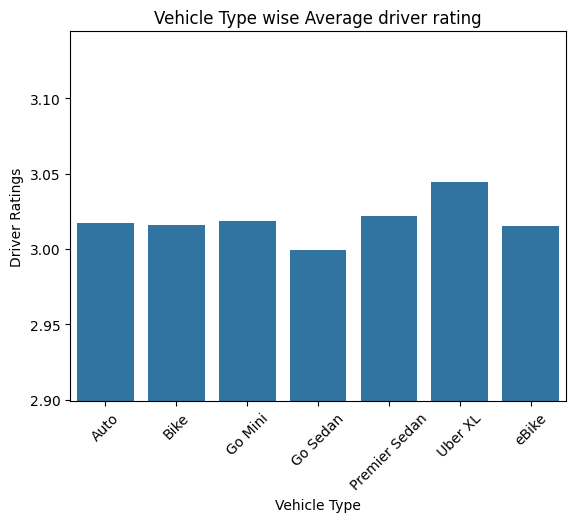

In [137]:
grp=data.groupby('Vehicle Type')['Driver Ratings'].mean().reset_index()
sns.barplot(data=grp, x='Vehicle Type', y='Driver Ratings')
plt.ylim(grp['Driver Ratings'].min()-0.1, grp['Driver Ratings'].max()+0.1)
plt.xticks(rotation=45)
plt.title("Vehicle Type wise Average driver rating")
plt.show()